# Unemployment Case Study

## Define problems and/or goals
 - Uncover underlying patterns
 - Address potential disparities
 - Evaluate economic health

This study will focus on sex-related data during exploration

## Determine type of data analytics to use
 - Exploratory data analysis
 - Descriptive analytics

## Collect data to solve the problem
Data comes from the following link:
https://www.kaggle.com/code/rajatraj0502/u-s-unemployment-rates/input

This study will focus on sex related data (df_sex_unemployment_rate.csv)

#### 1 ) Imports

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### 2 ) Read data

In [2]:
# Read csv file
df = pd.read_csv('df_sex_unemployment_rates.csv')

# Preview df
df.head()

,date,overall_rate,men_rate,women_rate,men_16_17_rate,women_16_17_rate,men_16_19_rate,women_16_19_rate,men_18_19_rate,women_18_19_rate,...,men_25_34_rate,women_25_34_rate,men_25_54_rate,women_25_54_rate,men_35_44_rate,women_35_44_rate,men_45_54_rate,women_45_54_rate,men_55plus_rate,women_55plus_rate
0,1948-01-01,3.4,3.4,3.3,9.7,8.8,9.4,7.2,9.5,6.8,...,2.6,4.3,2.3,2.8,2.1,1.8,2.3,2.1,3.0,NaN
1,1948-02-01,3.8,3.6,4.5,13.0,13.2,10.8,8.9,9.2,6.8,...,2.7,5.1,2.6,3.7,2.5,2.6,2.6,3.3,2.9,NaN
2,1948-03-01,4.0,3.8,4.4,14.0,11.4,11.9,8.6,10.3,7.3,...,2.7,3.5,2.6,3.3,2.6,3.0,2.4,3.3,2.8,NaN
3,1948-04-01,3.9,3.8,4.3,11.6,10.6,9.8,9.2,8.6,8.6,...,3.2,3.8,2.8,3.5,2.7,3.5,2.5,3.1,2.9,NaN
4,1948-05-01,3.5,3.5,3.7,7.1,5.4,7.6,6.1,8.6,7.0,...,2.9,3.3,2.5,3.1,2.4,3.0,2.3,2.9,3.1,NaN


## Clean/transform the data
 - Ensure usable data types
 - Fill missing data
 - Remove outliers

#### 1 ) Preview data types

In [3]:
# Preview dtypes
df.dtypes

date                  object
overall_rate         float64
men_rate             float64
women_rate           float64
men_16_17_rate       float64
women_16_17_rate     float64
men_16_19_rate       float64
women_16_19_rate     float64
men_18_19_rate       float64
women_18_19_rate     float64
men_16_24_rate       float64
women_16_24_rate     float64
men_20_24_rate       float64
women_20_24_rate     float64
men_25plus_rate      float64
women_25plus_rate    float64
men_25_34_rate       float64
women_25_34_rate     float64
men_25_54_rate       float64
women_25_54_rate     float64
men_35_44_rate       float64
women_35_44_rate     float64
men_45_54_rate       float64
women_45_54_rate     float64
men_55plus_rate      float64
women_55plus_rate    float64
dtype: object

Column data is all already correctly typed.

#### 2 ) Check for missing data instances

In [4]:
# Find the total number of missing entries for each column
df.isnull().sum()

date                   0
overall_rate           0
men_rate               0
women_rate             0
men_16_17_rate         0
women_16_17_rate       0
men_16_19_rate         0
women_16_19_rate       0
men_18_19_rate         0
women_18_19_rate       0
men_16_24_rate         0
women_16_24_rate       0
men_20_24_rate         0
women_20_24_rate       0
men_25plus_rate        0
women_25plus_rate      0
men_25_34_rate         0
women_25_34_rate       0
men_25_54_rate         0
women_25_54_rate       0
men_35_44_rate         0
women_35_44_rate       0
men_45_54_rate         0
women_45_54_rate       0
men_55plus_rate        0
women_55plus_rate    552
dtype: int64

Strangely, all data is accounted for except for a large amount of data from the women_55plus_rate column.

#### 3 ) Investigate missing data

In [5]:
## Options for showing rows (testing only)
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [6]:
# Show dates and the column with missing data
df.loc[:,["date", "women_55plus_rate"]]

,date,women_55plus_rate
0,1948-01-01,NaN
1,1948-02-01,NaN
2,1948-03-01,NaN
3,1948-04-01,NaN
4,1948-05-01,NaN
...,...,...
902,2023-03-01,2.4
903,2023-04-01,2.4
904,2023-05-01,2.6
905,2023-06-01,2.1


It appears that the unemployment data for women 55 and older was not collected before the year 1984 for this particular dataset.

#### 4 ) Fill missing data
Given the particular circumstances for the missing data, it may be more worthwhile to not fill the data. However, for the sake of completeness, we will fill the values with the column mean.

#### 5 ) Remove outliers

#### 6 ) Change date column to datetime type

In [7]:
# Set the date col to datetime
df['date'] = pd.to_datetime(df['date'])

# Preview dtypes
df.dtypes

date                 datetime64[ns]
overall_rate                float64
men_rate                    float64
women_rate                  float64
men_16_17_rate              float64
women_16_17_rate            float64
men_16_19_rate              float64
women_16_19_rate            float64
men_18_19_rate              float64
women_18_19_rate            float64
men_16_24_rate              float64
women_16_24_rate            float64
men_20_24_rate              float64
women_20_24_rate            float64
men_25plus_rate             float64
women_25plus_rate           float64
men_25_34_rate              float64
women_25_34_rate            float64
men_25_54_rate              float64
women_25_54_rate            float64
men_35_44_rate              float64
women_35_44_rate            float64
men_45_54_rate              float64
women_45_54_rate            float64
men_55plus_rate             float64
women_55plus_rate           float64
dtype: object

## Analyze the Data

### Question 1: What is the ratio of female unemployment to male unemployment over time

#### 1 ) Create "Year" and "Decade" columns

In [8]:
# Create a year col
df["year"] = df["date"].dt.year

# Create a decade col by doing int-div by 10 then mul by 10
df["decade"] = (df["date"].dt.year // 10) * 10

# Preview df
df.head()

,date,overall_rate,men_rate,women_rate,men_16_17_rate,women_16_17_rate,men_16_19_rate,women_16_19_rate,men_18_19_rate,women_18_19_rate,...,men_25_54_rate,women_25_54_rate,men_35_44_rate,women_35_44_rate,men_45_54_rate,women_45_54_rate,men_55plus_rate,women_55plus_rate,year,decade
0,1948-01-01,3.4,3.4,3.3,9.7,8.8,9.4,7.2,9.5,6.8,...,2.3,2.8,2.1,1.8,2.3,2.1,3.0,NaN,1948,1940
1,1948-02-01,3.8,3.6,4.5,13.0,13.2,10.8,8.9,9.2,6.8,...,2.6,3.7,2.5,2.6,2.6,3.3,2.9,NaN,1948,1940
2,1948-03-01,4.0,3.8,4.4,14.0,11.4,11.9,8.6,10.3,7.3,...,2.6,3.3,2.6,3.0,2.4,3.3,2.8,NaN,1948,1940
3,1948-04-01,3.9,3.8,4.3,11.6,10.6,9.8,9.2,8.6,8.6,...,2.8,3.5,2.7,3.5,2.5,3.1,2.9,NaN,1948,1940
4,1948-05-01,3.5,3.5,3.7,7.1,5.4,7.6,6.1,8.6,7.0,...,2.5,3.1,2.4,3.0,2.3,2.9,3.1,NaN,1948,1940


#### 2 ) Group by decade

In [9]:
# Sort values by order value
group_df = df.groupby('decade')[['men_rate', 'women_rate']].mean()

# Preview df
group_df

,men_rate,women_rate
decade,,
1940,4.841667,5.045833
1950,4.288333,5.010000
1960,4.263333,5.699167
1970,5.535000,7.231667
1980,7.240833,7.318333
1990,5.841667,5.668333
2000,5.740000,5.315833
2010,6.431667,5.982500
2020,5.325581,5.367442


#### 3 ) Plot data using a bar chart

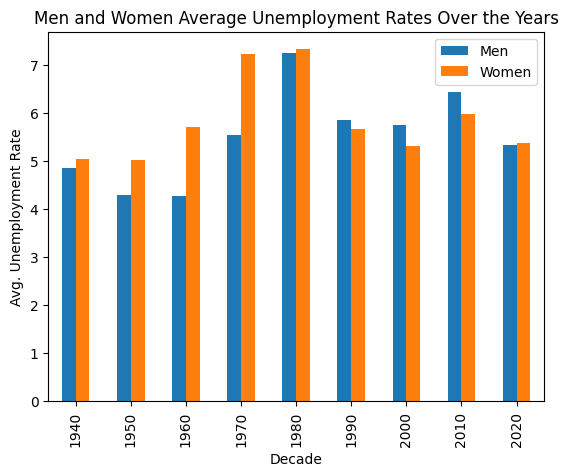

In [10]:
# Create a bar graph of the df
group_df.plot(kind = 'bar')

# Set labels, title, and legend
plt.xlabel('Decade')
plt.ylabel('Avg. Unemployment Rate')
plt.title('Men and Women Average Unemployment Rates Over the Years')
plt.legend(['Men', 'Women'])

#### Conclusion
The unemployment rates for men and women follow a similar trend: decreasing from 1940 to 1950, increasing until the 1980s, decreasing until the 2010s for a sharp increase, before decreasing further in the 2020s. Women had higher unemployment rates until the 1990s. Since the 90's men have had higher or similar rates of unemployment compared to women.

### Question 2: What is the ratio of female unemployment for different age groups over time

#### 1 ) Group by decade

In [11]:
# List the columns to be plotted
col_to_plot = ['women_16_24_rate', 'women_25_54_rate', 'women_55plus_rate']

# Group columns by decade
group_df = df.groupby("decade")[col_to_plot].mean()

# Preview df
group_df

,women_16_24_rate,women_25_54_rate,women_55plus_rate
decade,,,
1940,7.762500,4.233333,NaN
1950,8.084167,4.373333,NaN
1960,10.865833,4.553333,NaN
1970,12.862500,5.542500,NaN
1980,13.085000,6.010000,NaN
1990,11.313333,4.693333,3.197222
2000,10.721667,4.521667,3.527500
2010,11.520833,5.332500,4.350000
2020,9.897674,4.755814,4.416279


#### 2 ) Plot data using a line graph 

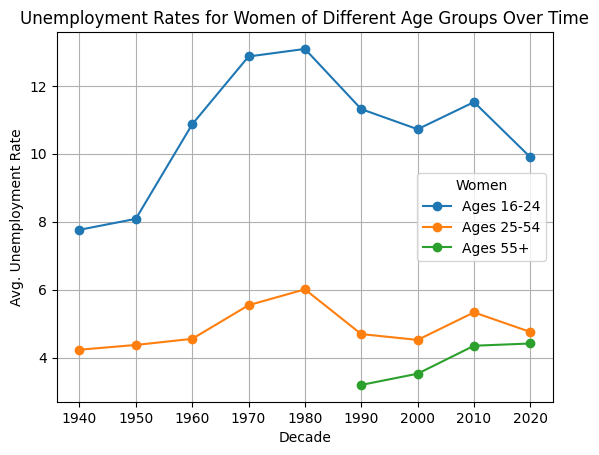

In [12]:
# Create a line graph of the data
group_df.plot(kind = 'line', marker = 'o')

# Set labels, title, settings, and legend
plt.xlabel('Decade')
plt.ylabel('Avg. Unemployment Rate')
plt.title('Unemployment Rates for Women of Different Age Groups Over Time')
plt.legend(['Ages 16-24', 'Ages 25-54', 'Ages 55+'], title = 'Women')
plt.grid(True)

#### Conclusion
It appears that women ages 16-24 have had considerably higher rates of unemployment than older women during each time period.

### Question 3: What is the ratio of male unemployment for different age groups over time

#### 1 ) Group by decade

In [13]:
# List the columns to be plotted
col_to_plot = ['men_16_24_rate', 'men_25_54_rate', 'men_55plus_rate']

# Group columns by decade
group_df = df.groupby("decade")[col_to_plot].mean()

# Preview df
group_df

,men_16_24_rate,men_25_54_rate,men_55plus_rate
decade,,,
1940,9.862500,3.679167,4.329167
1950,9.325000,3.393333,3.883333
1960,9.978333,3.025833,3.555833
1970,12.515833,3.689167,3.355000
1980,14.545833,5.736667,4.037500
1990,12.670833,4.651667,3.790000
2000,12.961667,4.669167,3.878333
2010,14.211667,5.410000,4.772500
2020,10.953488,4.662791,4.193023


#### 2 ) Plot data using a line graph

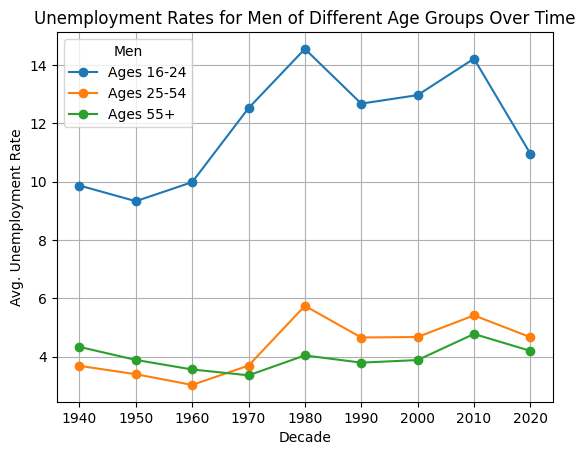

In [14]:
# Create a line graph of the data
group_df.plot(kind = 'line', marker = 'o')

# Set labels, title, settings, and legend
plt.xlabel('Decade')
plt.ylabel('Avg. Unemployment Rate')
plt.title('Unemployment Rates for Men of Different Age Groups Over Time')
plt.legend(['Ages 16-24', 'Ages 25-54', 'Ages 55+'], title = 'Men')
plt.grid(True)

#### Conclusion
Men's data appears similar to women's data in that men aged 16-24 have considerably higher rates of unemployment than do older age groups. However, male unemployment appears to reach higher rates of unemployment for men aged 16-24 in many decades.

### Question 4: How do unemployment rates of different groups of young men and women compare from 2010 to 2019

#### 1 ) Group data by decade

In [15]:
# List the columns to be plotted
col_to_plot = ['men_16_17_rate', 'men_18_19_rate', 'women_16_17_rate', 'women_18_19_rate']

# Group columns by decade
group_df = df.groupby("decade")[col_to_plot].mean()

# Preview df
group_df.loc[2010]

men_16_17_rate      23.065833
men_18_19_rate      19.816667
women_16_17_rate    19.410000
women_18_19_rate    15.490000
Name: 2010, dtype: float64

#### 2 ) Plot data using a pie chart

Text(0.5, 1.0, 'Unemployment Rates for Young Men and Women from 2010 to 2019')

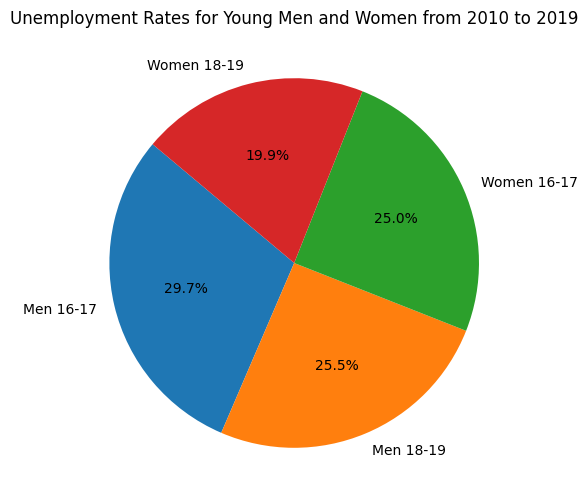

In [16]:
# Create a pie graph of the data, set labels, and set attributes
plt.figure(figsize = (6, 6))
plt.pie(group_df.loc[2010], labels=['Men 16-17', 'Men 18-19', 'Women 16-17', 'Women 18-19'], autopct='%1.1f%%', startangle=140)

# Set title
plt.title('Unemployment Rates for Young Men and Women from 2010 to 2019')

### Conclusion
Young men in the 2010s appear to have had slightly higher rates of unemployment compared to 

## Present/Visualize the Data

## Report/Storytelling
The graphs shown above can be used to see some interesting trends:
 1) Younger men and women (16-24) historically see higher rates of unemployment than older groups. This may be because many teenagers and young adults are focusing on school or are not entering the job market yet.
 1) Older men and women (55+) historically see much lower rates of unemployment than younger groups. This is likely because they are still working towards retirement at the age of 65+.
 1) Young men appear to have higher rates of unemployment than do young women.
 1) Unemployment spikes occur around 1980s and 2010s. The first spike was caused by the early 1980's recession, sometimes called "Reagan's recession" in the US. This recession was caused by tight monetary policies put into place in an effort to fight high global inflation percentages at the time. The second spike was caused by the 2000's to 2010's recession, often called the "Great Recession" in the US. This recession was caused by US housing policies that lead to the real-estate bubble bursting.

### Define Other Possible Problems to Analyze
 - Reasons for the lack of women 55+ data before 1984
 - Reasons for young women generally having lower unemployment rates than young men
 - During which years did unemployment rates change direction overall (either began increasing or began decreasing)